In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ti = x_train[0]
print(ti.shape)

(32, 32, 3)


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


## 3D

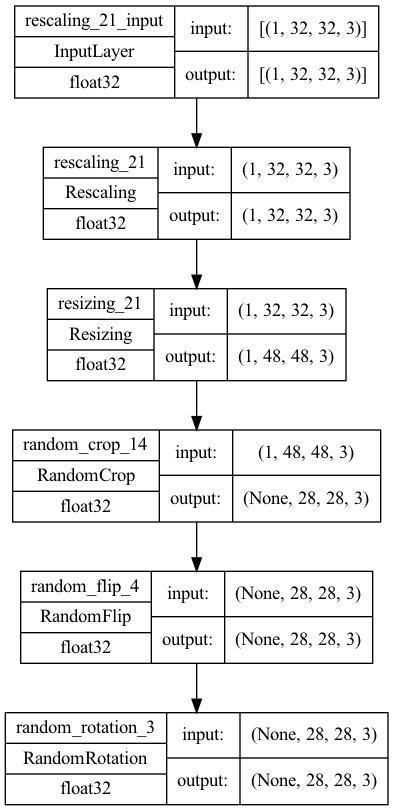

In [53]:
# model = Sequential([Rescaling(1/255.),
#                     Resizing(int(ti.shape[0]*1.5), int(ti.shape[1]*1.5)),
#                     RandomCrop(28, 28)])

model = Sequential([Rescaling(1/255.),
                   Resizing(int(ti.shape[0]*1.5),
                           int(ti.shape[1]*1.5)),
                   RandomCrop(28,28),
                   RandomFlip('horizontal'),
                   RandomRotation(np.random.randint(0,360))])

Model.build(model, (1, ti.shape[0], ti.shape[1], 3)) # 3차원

plot_model(model, show_shapes=True, show_dtype=True, show_layer_activations=True)

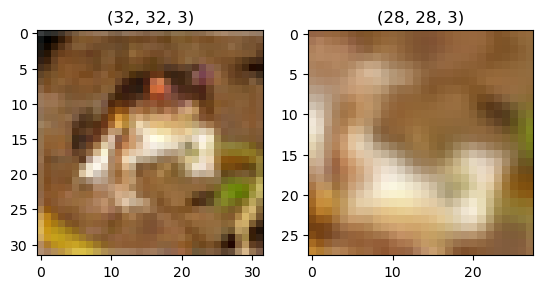

In [54]:
# new = tf.reshape(model(x_train[:1]), [28, 28])

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.imshow(ti, cmap='gray')
ax2.imshow(model(ti), cmap='gray')
ax1.set_title(ti.shape)
ax2.set_title(model(ti).shape);

In [43]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
ti = x_train[0]
print(ti.shape)

(28, 28)


## 2D 

In [45]:
from tensorflow.keras.layers import Rescaling, Resizing
from tensorflow.keras.models import Model

model = Sequential([Rescaling(1/255.),
                   Resizing(int(ti.shape[0]*1.5),
                           int(ti.shape[1]*1.5)),
                   RandomCrop(28,28),
                   RandomFlip('horizontal'),
                   RandomRotation(np.random.randint(0,360))])

Model.build(model, (1, ti.shape[0], ti.shape[1], 1)) # 2차원

2022-12-05 16:38:35.733000: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: loop_body/cond/branch_executed/_9


Text(0.5, 1.0, '(28, 28)')

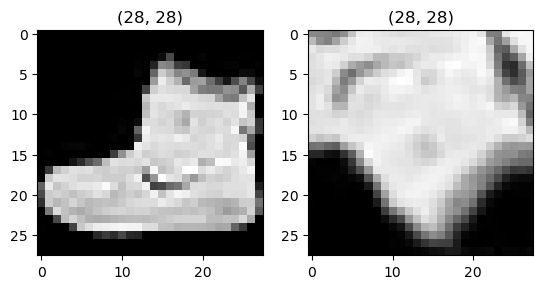

In [48]:
new = tf.reshape(model(x_train[:1]), [28, 28])

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.imshow(ti, cmap='gray')
ax2.imshow(new, cmap='gray')
ax1.set_title(ti.shape)
ax2.set_title(new.shape)

# 실습

### 데이터를 불러옵니다.

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
ti = x_train[0]
print(ti.shape)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32, 32, 3)
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


(32, 32, 3)
[6]


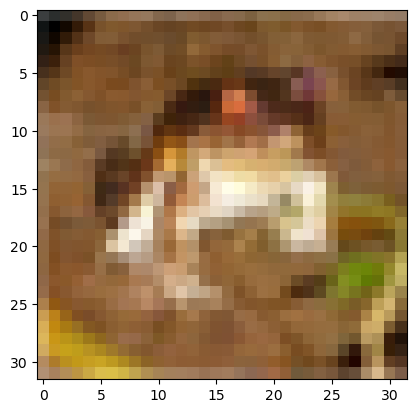

In [6]:
print(x_train[0].shape)
plt.imshow(x_train[0])
print(y_train[0])

In [22]:
def augmentattion(x_train, y_train, resizing) :
    
    model = Sequential([Rescaling(1/255.),
                        resizing,
                       RandomCrop(32,32), # 32 X 32로 조정되어 중심축이 변경되며 일부가 잘려진다.
                       RandomFlip('horizontal'),
                       RandomRotation(np.random.randint(0,360))])

    Model.build(model, (1, ti.shape[0], ti.shape[1], 3)) # 3차원
    
    globals()[f"x_train_2"] = model(x_train)
                
    # 데이터 결합
    globals()[f"x_train_all"] = np.concatenate((x_train, x_train_2), axis=0) 
    globals()[f"y_train_all"] = np.concatenate((y_train, y_train), axis=0)
    
    
    
resizing = Resizing(int(ti.shape[0]*1.1), int(ti.shape[1]*1.1)) 
augmentattion(x_train, y_train, resizing)

2022-12-06 10:14:35.430230: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: loop_body/cond/branch_executed/_9


In [23]:
print(x_train.shape)
print(x_train_2.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [24]:
print(x_train_all.shape)
print(y_train_all.shape)

(100000, 32, 32, 3)
(100000, 1)


## 모델생성
> AlesNet : 더 크고 깊을 뿐 LeNet-5와 비슷하며 최초로 합성곱층에 풀링층을 쌓지 않고 바로 합성곱 층 끼리 쌓았다. 앙상블을 시도 했다.

In [35]:
i_shapes = x_train_all.shape[1:]

model1 = tf.keras.models.Sequential([ #LeNet5       
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation='relu', input_shape=i_shapes),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model2 = tf.keras.models.Sequential([ #LeNet5         
    tf.keras.layers.Conv2D(32, kernel_size=5, padding="same", activation='relu', input_shape=i_shapes),
    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Conv2D(48, kernel_size=5, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),  
    tf.keras.layers.Dense(10, activation='softmax')
])

model3 = tf.keras.models.Sequential([ #AlexNet      
    tf.keras.layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=i_shapes),
    tf.keras.layers.Conv2D(96, 11, strides=4, padding='same'),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Conv2D(256, 5, strides=4, padding='same'),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(3, strides=2),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(384, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(256, 3, strides=4, padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model4 = tf.keras.models.Sequential([ #ESK  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=i_shapes),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((4,4)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='elu'),    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
# from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, my_callback) : # + best model select.

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #No OneHot Encoding
              metrics=['acc'])
    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=20, verbose=1,
        validation_data=0.2, callbacks=[my_callback, save_best_model]) 
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

In [37]:
mdFit(model4, 4, x_train_all, y_train_all, my_callback)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                                 
                                                      

In [38]:
mdEval(best_model4, x_test, y_test)
# resize 1.5, LeNet5
# 334/334 [==============================] - 3s 9ms/step - loss: 1.4023 - acc: 0.5829 

# resize 1.1, LeNet5
# 334/334 [==============================] - 3s 10ms/step - loss: 3.9545 - acc: 0.5973

# resize 1.1, ESK
# 334/334 [==============================] - 4s 12ms/step - loss: 0.9026 - acc: 0.6947

334/334 [==============================] - 4s 12ms/step - loss: 0.9026 - acc: 0.6947


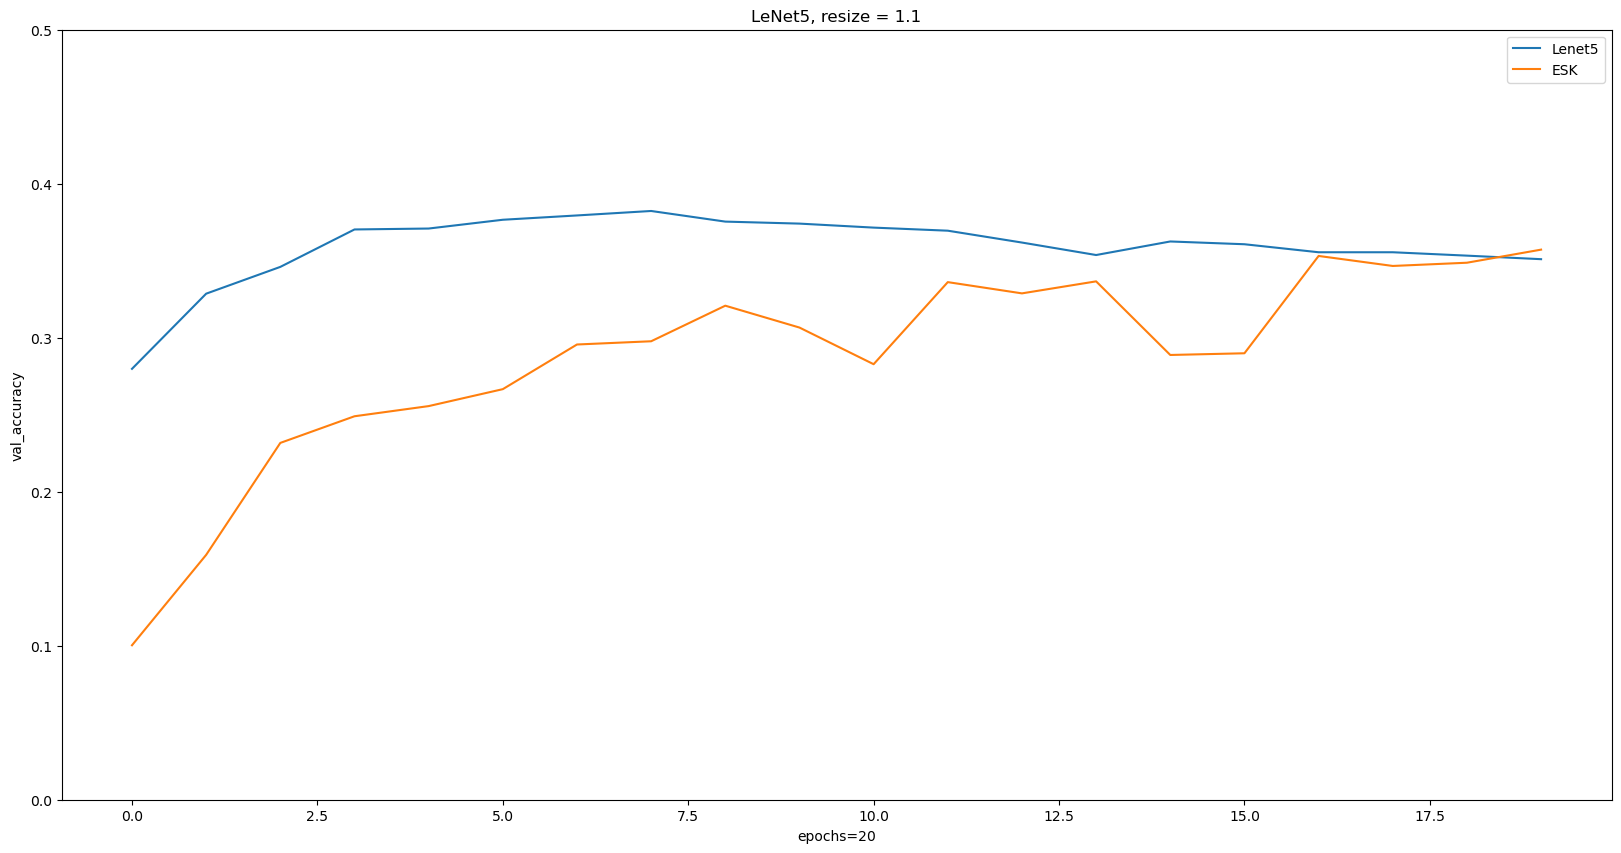

In [43]:
plt.figure(figsize=(20,10))
# plt.plot(hist1.history['val_loss'], label='val_loss1')
# plt.plot(hist2.history['val_loss'], label='val_loss2')
# plt.plot(hist3.history['val_loss'], label='val_loss3')
# plt.plot(hist4.history['val_loss'], label='val_loss4')
plt.plot(hist2.history['val_acc'], label='Lenet5')
plt.plot(hist4.history['val_acc'], label='ESK')
# plt.plot(hist1.history['val_accuracy'], label='Flatten, 2hd')
# plt.plot(hist2.history['val_accuracy'], label='Flatten, 3hd')
# plt.plot(hist3.history['val_accuracy'], label='Flatten, 4hd')
# plt.plot(hist4.history['val_accuracy'], label='Conv2D')
# plt.plot(hist5.history['val_accuracy'], label='Conv2D_2')
plt.ylim(0, 0.5)
plt.title("LeNet5, resize = 1.1")
plt.ylabel("val_accuracy")
plt.xlabel("epochs=20")
plt.legend()


# 결과

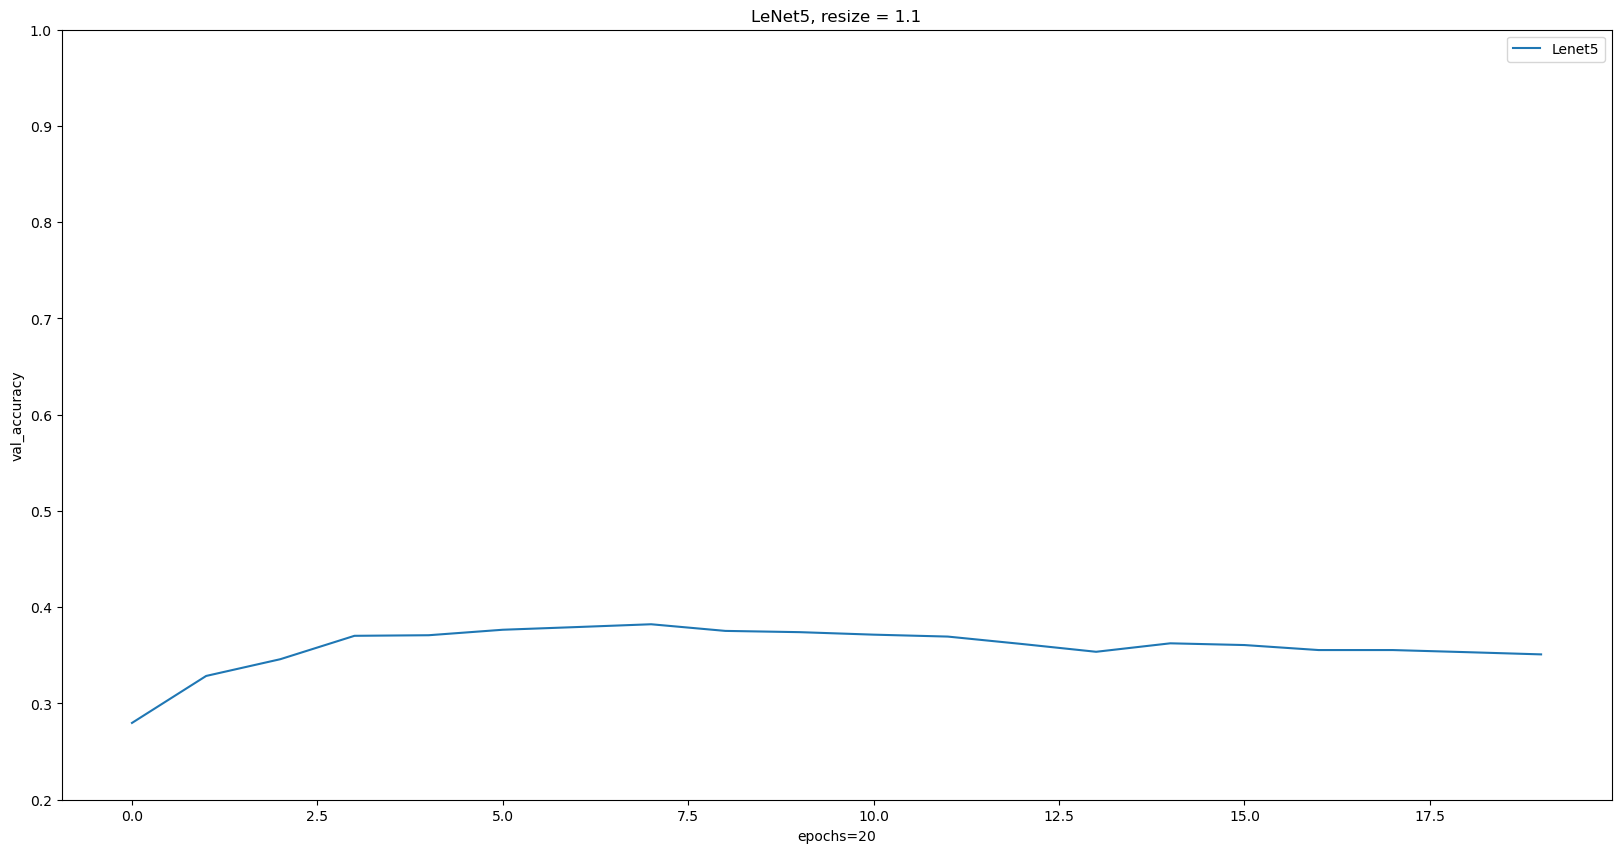

In [32]:
Image('./JupyterImage/221206/LeNet5, resize = 1.1.png')
# Model2

In [44]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 48)        38448     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 48)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1728)              0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [45]:
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                                 
                                                      